## Airline Airfare Prediciton
Found this dataset on Kaggle and decided I would play around with it and see what observations I could find

In [1]:
# Import Libraries


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# import our data set

df = pd.read_csv("data/Airline_Market_Fare_Prediction_Data/MarketFarePredictionData.csv")


In [4]:
df.head()

,MktCoupons,OriginCityMarketID,DestCityMarketID,OriginAirportID,DestAirportID,Carrier,NonStopMiles,RoundTrip,ODPairID,Pax,...,Circuity,Slot,Non_Stop,MktMilesFlown,OriginCityMarketID_freq,DestCityMarketID_freq,OriginAirportID_freq,DestAirportID_freq,Carrier_freq,ODPairID_freq
0,2,178,152,170,255,6,1807.0,1.0,4035,136.0,...,1.367460,0,0.0,1992.449761,0.004138,0.039783,0.004138,0.022049,0.116826,0.000132
1,2,178,152,170,194,20,1798.0,1.0,4035,136.0,...,1.051724,0,0.0,1992.449761,0.004138,0.039783,0.004138,0.008368,0.307651,0.000132
2,2,178,152,170,260,6,1784.0,0.0,4035,136.0,...,1.034753,0,0.0,1992.449761,0.004138,0.039783,0.004138,0.009366,0.116826,0.000132
3,2,178,152,170,255,6,1807.0,1.0,4035,136.0,...,1.029884,0,0.0,1992.449761,0.004138,0.039783,0.004138,0.022049,0.116826,0.000132
4,2,178,152,170,194,20,1798.0,1.0,4035,136.0,...,1.062291,0,0.0,1992.449761,0.004138,0.039783,0.004138,0.008368,0.307651,0.000132


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581278 entries, 0 to 1581277
Data columns (total 26 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   MktCoupons               1581278 non-null  int64  
 1   OriginCityMarketID       1581278 non-null  int64  
 2   DestCityMarketID         1581278 non-null  int64  
 3   OriginAirportID          1581278 non-null  int64  
 4   DestAirportID            1581278 non-null  int64  
 5   Carrier                  1581278 non-null  int64  
 6   NonStopMiles             1581278 non-null  float64
 7   RoundTrip                1581278 non-null  float64
 8   ODPairID                 1581278 non-null  int64  
 9   Pax                      1581278 non-null  float64
 10  CarrierPax               1581278 non-null  float64
 11  Average_Fare             1581278 non-null  float64
 12  Market_share             1581278 non-null  float64
 13  Market_HHI               1581278 non-null 

In [9]:
print("=== PAX COLUMN INVESTIGATION ===")
print(f"Data type: {df['Pax'].dtype}")
print(f"Number of non-null values: {df['Pax'].count()}")
print(f"Number of null values: {df['Pax'].isnull().sum()}")
print(f"Total rows: {len(df)}")

=== PAX COLUMN INVESTIGATION ===
Data type: float64
Number of non-null values: 1581278
Number of null values: 0
Total rows: 1581278


In [19]:
for col in df.columns:
    min_val = df[col].min()
    max_val = df[col].max()
    print(f"{col:<25}: {min_val:>10} to {max_val:>10}")

MktCoupons               :          1 to          3
OriginCityMarketID       :          0 to        266
DestCityMarketID         :          0 to        267
OriginAirportID          :          0 to        290
DestAirportID            :          0 to        291
Carrier                  :          0 to         24
NonStopMiles             :      100.0 to     5095.0
RoundTrip                :        0.0 to        1.0
ODPairID                 :          0 to       5354
Pax                      :        1.0 to  1495396.0
CarrierPax               :        1.0 to   706835.0
Average_Fare             :      67.39 to    1265.99
Market_share             : 0.0500113946290864 to        1.0
Market_HHI               :    1553.42 to    10000.0
LCC_Comp                 :          0 to          1
Multi_Airport            :          0 to          1
Circuity                 :        1.0 to 2.9858247422680413
Slot                     :          0 to          1
Non_Stop                 :        0.0 to        

In [22]:
print("=== AVERAGE_FARE ANALYSIS ===")
print(f"Basic stats for Average_Fare:")
print(df['Average_Fare'].describe())

print(f"\nFare distribution:")
print(f"Minimum fare: ${df['Average_Fare'].min():.2f}")
print(f"Maximum fare: ${df['Average_Fare'].max():.5f}")
print(f"Median fare: ${df['Average_Fare'].median():.2f}")
print(f"Mean fare: ${df['Average_Fare'].mean():.2f}")




=== AVERAGE_FARE ANALYSIS ===
Basic stats for Average_Fare:
count    1.581278e+06
mean     2.144831e+02
std      7.337322e+01
min      6.739000e+01
25%      1.669400e+02
50%      2.022700e+02
75%      2.466400e+02
max      1.265990e+03
Name: Average_Fare, dtype: float64

Fare distribution:
Minimum fare: $67.39
Maximum fare: $1265.99000
Median fare: $202.27
Mean fare: $214.48


In [33]:
print(df["NonStopMiles"].describe())


print(f"Min miles: {df['NonStopMiles'].min()}")
print(f"Max miles: {df['NonStopMiles'].max()}")
print(f"Mean miles: {df['NonStopMiles'].mean()}")
print(f"Median miles: {df['NonStopMiles'].median()}")

count    1.581278e+06
mean     1.183158e+03
std      7.136535e+02
min      1.000000e+02
25%      6.430000e+02
50%      1.011000e+03
75%      1.590000e+03
max      5.095000e+03
Name: NonStopMiles, dtype: float64
Min miles: 100.0
Max miles: 5095.0
Mean miles: 1183.1578337268968
Median miles: 1011.0


In [43]:
key_columns = ['Average_Fare', 'NonStopMiles']
df[key_columns]


corr_matrix = df[key_columns].corr()
corr_matrix

,Average_Fare,NonStopMiles
Average_Fare,1.000000,0.734829
NonStopMiles,0.734829,1.000000


In [59]:
print("=== FULL CORRELATION MATRIX FOR ALL COLUMNS ===")
corr_matrix_full = df.corr()

# Find highest correlations across ALL variables
correlations_all = []
for i in range(len(corr_matrix_full.columns)):
    for j in range(i+1, len(corr_matrix_full.columns)):
        col1 = corr_matrix_full.columns[i] 
        col2 = corr_matrix_full.columns[j]
        corr_val = corr_matrix_full.iloc[i, j]
        correlations_all.append((abs(corr_val), corr_val, col1, col2))

# Sort by absolute correlation value
correlations_all.sort(reverse=True)

print("Top 15 highest correlations in the entire dataset:")
for i, (abs_corr, corr_val, col1, col2) in enumerate(correlations_all[:15]):
    print(f"{i+1:2d}. {col1:<25} & {col2:<25}: {corr_val:>7.3f}")

=== FULL CORRELATION MATRIX FOR ALL COLUMNS ===
Top 15 highest correlations in the entire dataset:
 1. NonStopMiles              & MktMilesFlown            :   0.998
 2. MktCoupons                & Non_Stop                 :  -0.995
 3. OriginCityMarketID        & ODPairID                 :   0.995
 4. Pax                       & ODPairID_freq            :   0.843
 5. Market_share              & Market_HHI               :   0.818
 6. Pax                       & CarrierPax               :   0.791
 7. NonStopMiles              & Average_Fare             :   0.735
 8. Average_Fare              & MktMilesFlown            :   0.735
 9. DestCityMarketID          & DestAirportID            :   0.618
10. OriginAirportID           & ODPairID                 :   0.617
11. OriginCityMarketID        & OriginAirportID          :   0.616
12. OriginCityMarketID_freq   & OriginAirportID_freq     :   0.616
13. DestCityMarketID_freq     & DestAirportID_freq       :   0.616
14. CarrierPax                

In [50]:
corr_matrix_full

,MktCoupons,OriginCityMarketID,DestCityMarketID,OriginAirportID,DestAirportID,Carrier,NonStopMiles,RoundTrip,ODPairID,Pax,...,Circuity,Slot,Non_Stop,MktMilesFlown,OriginCityMarketID_freq,DestCityMarketID_freq,OriginAirportID_freq,DestAirportID_freq,Carrier_freq,ODPairID_freq
MktCoupons,1.000000,0.060176,0.064342,0.041985,0.043945,0.128699,0.235666,-0.065686,0.059141,-0.137663,...,0.518667,-0.062560,-0.994965,0.259700,-0.046597,-0.047732,-0.093488,-0.097734,0.313730,-0.049685
OriginCityMarketID,0.060176,1.000000,-0.064912,0.616457,-0.041622,-0.006810,0.078017,-0.006098,0.994804,-0.043110,...,0.027197,-0.016961,-0.061234,0.081603,-0.194019,0.092142,-0.348075,0.101220,-0.039069,0.000097
DestCityMarketID,0.064342,-0.064912,1.000000,-0.040649,0.617566,-0.004993,0.079640,-0.008631,-0.049342,-0.037335,...,0.026978,-0.015529,-0.065354,0.083411,0.092108,-0.194473,0.100821,-0.354835,-0.035716,0.003335
OriginAirportID,0.041985,0.616457,-0.040649,1.000000,-0.037300,0.015842,0.074656,-0.001598,0.616796,-0.017597,...,0.016961,-0.037603,-0.043330,0.077142,-0.093662,0.038051,-0.109424,0.026974,0.015871,-0.004568
DestAirportID,0.043945,-0.041622,0.617566,-0.037300,1.000000,0.017183,0.077248,-0.002332,-0.031051,-0.015941,...,0.013730,-0.035908,-0.045106,0.079313,0.038856,-0.091786,0.028345,-0.110720,0.017833,-0.001987
Carrier,0.128699,-0.006810,-0.004993,0.015842,0.017183,1.000000,-0.164421,0.061025,-0.006183,-0.090373,...,0.079324,-0.130046,-0.132377,-0.154774,-0.052271,-0.057235,-0.118194,-0.124398,0.445564,-0.111009
NonStopMiles,0.235666,0.078017,0.079640,0.074656,0.077248,-0.164421,1.000000,-0.035753,0.079383,-0.038803,...,-0.009104,0.016567,-0.234652,0.998268,0.149273,0.145617,0.141831,0.137328,-0.003954,0.229655
RoundTrip,-0.065686,-0.006098,-0.008631,-0.001598,-0.002332,0.061025,-0.035753,1.000000,-0.007893,-0.052790,...,-0.054286,-0.057062,0.067310,-0.036563,-0.044409,-0.046899,-0.024387,-0.022930,0.053270,-0.064824
ODPairID,0.059141,0.994804,-0.049342,0.616796,-0.031051,-0.006183,0.079383,-0.007893,1.000000,-0.039719,...,0.026871,0.000403,-0.060210,0.082911,-0.179145,0.088697,-0.349877,0.099428,-0.047498,0.010503
Pax,-0.137663,-0.043110,-0.037335,-0.017597,-0.015941,-0.090373,-0.038803,-0.052790,-0.039719,1.000000,...,-0.061556,0.260073,0.140973,-0.048107,0.460185,0.457577,0.255492,0.252585,0.009708,0.842939


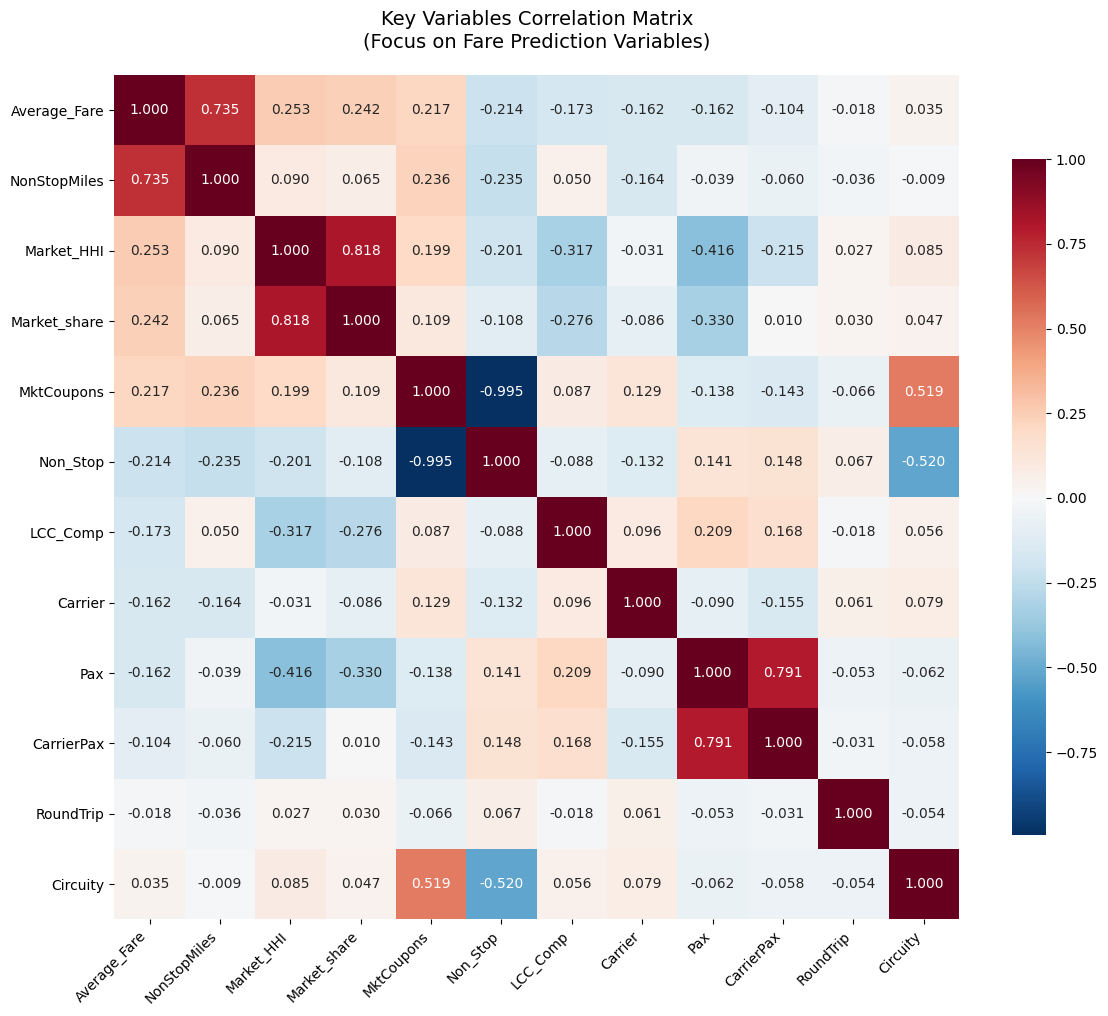

In [87]:
# Create a focused heatmap with key variables for better readability
key_variables = [
    'Average_Fare',      # Our target
    'NonStopMiles',      # Strongest predictor
    'Market_HHI',        # Competition
    'Market_share',      # Market power
    'MktCoupons',        # Flight complexity
    'Non_Stop',          # Direct vs connecting
    'LCC_Comp',          # LCC competition
    'Carrier',           # Airline
    'Pax',              # Passenger volume
    'CarrierPax',       # Carrier passengers
    'RoundTrip',        # Trip type
    'Circuity'          # Route efficiency
]

# Create correlation matrix for key variables
key_corr_matrix = df[key_variables].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(key_corr_matrix, 
            annot=True, 
            cmap='RdBu_r', 
            center=0,
            square=True,
            fmt='.3f',
            cbar_kws={"shrink": .8},
            annot_kws={'size': 10})

plt.title('Key Variables Correlation Matrix\n(Focus on Fare Prediction Variables)', fontsize=14, pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

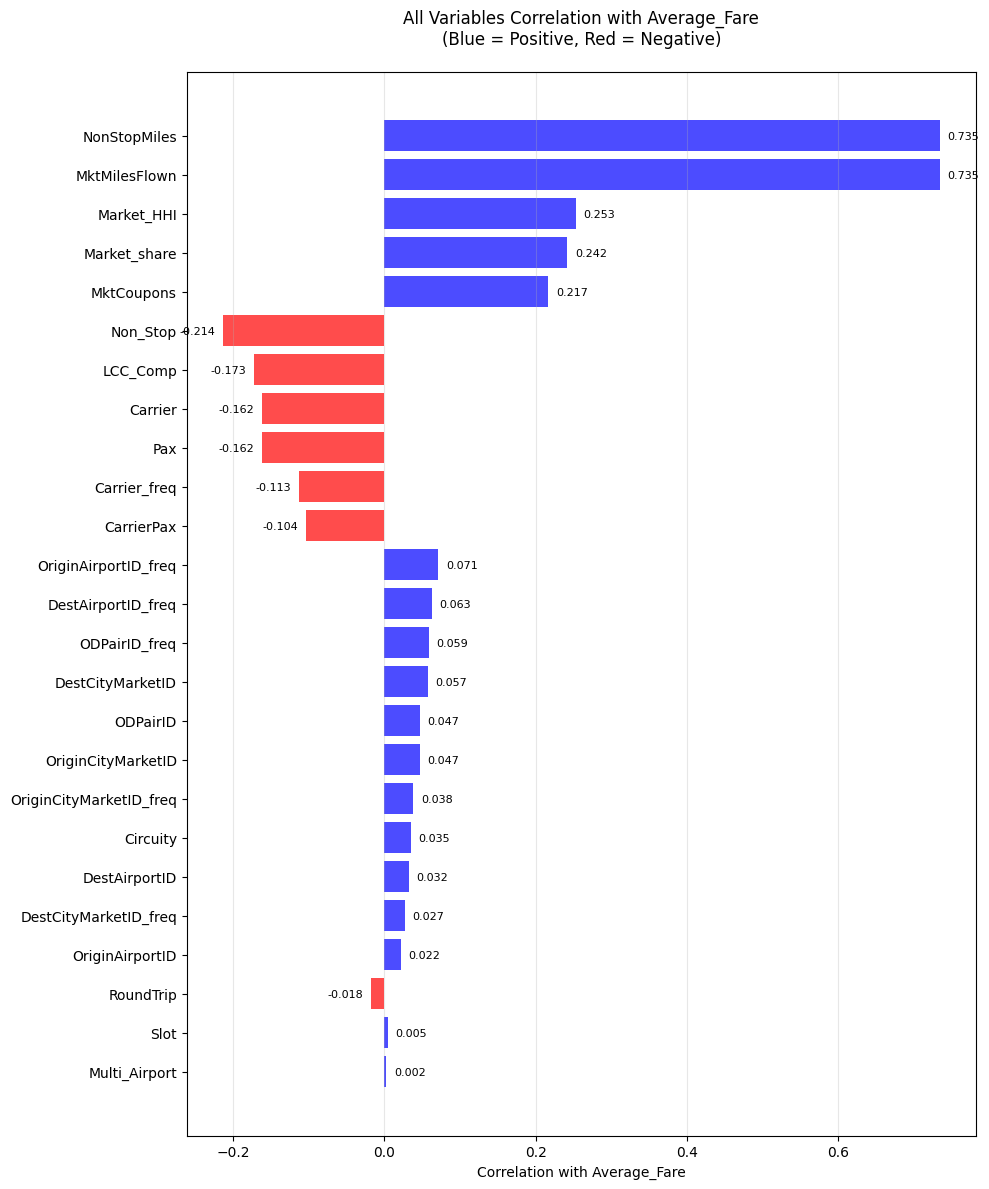

In [88]:
# Create a bar chart showing correlations with Average_Fare
fare_correlations = corr_matrix_full['Average_Fare'].drop('Average_Fare').sort_values(key=abs, ascending=True)

plt.figure(figsize=(10, 12))
colors = ['red' if x < 0 else 'blue' for x in fare_correlations.values]
bars = plt.barh(range(len(fare_correlations)), fare_correlations.values, color=colors, alpha=0.7)

plt.yticks(range(len(fare_correlations)), fare_correlations.index)
plt.xlabel('Correlation with Average_Fare')
plt.title('All Variables Correlation with Average_Fare\n(Blue = Positive, Red = Negative)', fontsize=12, pad=20)
plt.grid(axis='x', alpha=0.3)

# Add correlation values on bars
for i, (bar, value) in enumerate(zip(bars, fare_correlations.values)):
    plt.text(value + (0.01 if value > 0 else -0.01), i, f'{value:.3f}', 
             va='center', ha='left' if value > 0 else 'right', fontsize=8)

plt.tight_layout()
plt.show()

In [60]:
print("\n=== TOP FARE PREDICTORS (excluding redundant variables) ===")

# Get correlations with Average_Fare, removing redundant variables
fare_correlations = corr_matrix_full['Average_Fare'].abs().sort_values(ascending=False)

# Remove redundant variables
redundant_vars = ['MktMilesFlown']  # Keep NonStopMiles, remove MktMilesFlown
important_predictors = []

for var, corr in fare_correlations.items():
    if var != 'Average_Fare' and var not in redundant_vars:
        important_predictors.append((var, corr))

print("Key variables for predicting Average_Fare:")
for i, (var, corr) in enumerate(important_predictors[:10]):
    print(f"{i+1:2d}. {var:<25}: {corr:.3f}")


=== TOP FARE PREDICTORS (excluding redundant variables) ===
Key variables for predicting Average_Fare:
 1. NonStopMiles             : 0.735
 2. Market_HHI               : 0.253
 3. Market_share             : 0.242
 4. MktCoupons               : 0.217
 5. Non_Stop                 : 0.214
 6. LCC_Comp                 : 0.173
 7. Carrier                  : 0.162
 8. Pax                      : 0.162
 9. Carrier_freq             : 0.113
10. CarrierPax               : 0.104


In [61]:
print("\n=== MARKET COMPETITION ANALYSIS ===")

# Look at how competition affects fares
print("Low-Cost Carrier Competition Effect:")
lcc_comparison = df.groupby('LCC_Comp')['Average_Fare'].agg(['mean', 'count'])
print(lcc_comparison)

print(f"\nFare difference when LCC present:")
fare_diff = lcc_comparison.loc[1, 'mean'] - lcc_comparison.loc[0, 'mean']
print(f"Routes with LCC competition cost ${fare_diff:.2f} {'less' if fare_diff < 0 else 'more'} on average")

# Market concentration (HHI) effect
print(f"\nMarket Concentration (HHI) ranges:")
print(f"  Min HHI: {df['Market_HHI'].min():.0f} (very competitive)")
print(f"  Max HHI: {df['Market_HHI'].max():.0f} (monopoly)")
print(f"  Mean HHI: {df['Market_HHI'].mean():.0f}")


=== MARKET COMPETITION ANALYSIS ===
Low-Cost Carrier Competition Effect:
                mean    count
LCC_Comp                     
0         250.760819   171747
1         210.062734  1409531

Fare difference when LCC present:
Routes with LCC competition cost $-40.70 less on average

Market Concentration (HHI) ranges:
  Min HHI: 1553 (very competitive)
  Max HHI: 10000 (monopoly)
  Mean HHI: 5013


In [65]:
print("=== COMPETITIVE MARKETS vs MONOPOLIES ===")

# Define market types based on HHI
very_competitive = df[df['Market_HHI'] < 1600]  # Multiple competitors
monopoly = df[df['Market_HHI'] == 10000]        # Single airline (pure monopoly)

print(f"Market Type Breakdown:")
print(f"Very Competitive (HHI < 1500):  {len(very_competitive):,} routes")
print(f"Pure Monopoly (HHI = 10000):    {len(monopoly):,} routes")
print(f"Total routes in dataset:        {len(df):,} routes")

# Compare average fares
comp_fare = very_competitive['Average_Fare'].mean()
mono_fare = monopoly['Average_Fare'].mean()
fare_difference = mono_fare - comp_fare
percent_increase = (fare_difference / comp_fare) * 100

print(f"\n💰 FARE COMPARISON:")
print(f"Very Competitive Markets:  ${comp_fare:.2f} average fare")
print(f"Monopoly Markets:          ${mono_fare:.2f} average fare")
print(f"Monopoly Premium:          ${fare_difference:.2f} ({percent_increase:.1f}% higher!)")

=== COMPETITIVE MARKETS vs MONOPOLIES ===
Market Type Breakdown:
Very Competitive (HHI < 1500):  281 routes
Pure Monopoly (HHI = 10000):    122,784 routes
Total routes in dataset:        1,581,278 routes

💰 FARE COMPARISON:
Very Competitive Markets:  $152.03 average fare
Monopoly Markets:          $250.90 average fare
Monopoly Premium:          $98.87 (65.0% higher!)


In [67]:
print("=== FARE PER MILE ANALYSIS ===")

# Calculate fare per mile for all flights
df['Fare_Per_Mile'] = df['Average_Fare'] / df['NonStopMiles']

print("Fare per mile statistics:")
print(df['Fare_Per_Mile'].describe())

# Define market types
very_competitive = df[df['Market_HHI'] < 1600]
monopoly = df[df['Market_HHI'] == 10000]

# Compare fare per mile (distance normalized)
comp_fare_per_mile = very_competitive['Fare_Per_Mile'].mean()
mono_fare_per_mile = monopoly['Fare_Per_Mile'].mean()
fare_per_mile_diff = mono_fare_per_mile - comp_fare_per_mile
percent_increase = (fare_per_mile_diff / comp_fare_per_mile) * 100

print(f"\n💰 DISTANCE-NORMALIZED COMPARISON:")
print(f"Competitive Markets:  ${comp_fare_per_mile:.4f} per mile")
print(f"Monopoly Markets:     ${mono_fare_per_mile:.4f} per mile")
print(f"Monopoly Premium:     ${fare_per_mile_diff:.4f} per mile ({percent_increase:.1f}% higher!)")

=== FARE PER MILE ANALYSIS ===
Fare per mile statistics:
count    1.581278e+06
mean     2.385953e-01
std      1.476854e-01
min      4.331081e-02
25%      1.455942e-01
50%      1.919799e-01
75%      2.805676e-01
max      2.345600e+00
Name: Fare_Per_Mile, dtype: float64

💰 DISTANCE-NORMALIZED COMPARISON:
Competitive Markets:  $0.5163 per mile
Monopoly Markets:     $0.2226 per mile
Monopoly Premium:     $-0.2937 per mile (-56.9% higher!)


In [68]:
print("\n=== FARE PER MILE BY COMPETITION LEVEL ===")

# Create more detailed HHI categories
df['Competition_Level'] = pd.cut(df['Market_HHI'], 
                                bins=[0, 1600, 2500, 5000, 9999, 10000], 
                                labels=['Highly Competitive (<1500)', 
                                       'Competitive (1500-2500)',
                                       'Moderate (2500-5000)',
                                       'Concentrated (5000-9999)',
                                       'Monopoly (10000)'])

# Analyze fare per mile by competition level
competition_analysis = df.groupby('Competition_Level')['Fare_Per_Mile'].agg(['mean', 'median', 'count', 'std'])
print("Fare per mile by competition level:")
print(competition_analysis.round(4))

print(f"\n📈 MONOPOLY PREMIUM BREAKDOWN:")
baseline = competition_analysis.loc['Highly Competitive (<1500)', 'mean']
for level in competition_analysis.index:
    current_rate = competition_analysis.loc[level, 'mean']
    premium = current_rate - baseline
    premium_pct = (premium / baseline) * 100
    count = competition_analysis.loc[level, 'count']
    print(f"{level:<25}: ${current_rate:.4f}/mile (+{premium_pct:>5.1f}%) [{count:>6,} routes]")


=== FARE PER MILE BY COMPETITION LEVEL ===
Fare per mile by competition level:
                              mean  median   count     std
Competition_Level                                         
Highly Competitive (<1500)  0.5163  0.5352     281  0.0428
Competitive (1500-2500)     0.2371  0.1889  181278  0.1523
Moderate (2500-5000)        0.2327  0.1896  782182  0.1412
Concentrated (5000-9999)    0.2522  0.2053  494333  0.1556
Monopoly (10000)            0.2232  0.1802  123204  0.1434

📈 MONOPOLY PREMIUM BREAKDOWN:
Highly Competitive (<1500): $0.5163/mile (+  0.0%) [   281 routes]
Competitive (1500-2500)  : $0.2371/mile (+-54.1%) [181,278 routes]
Moderate (2500-5000)     : $0.2327/mile (+-54.9%) [782,182 routes]
Concentrated (5000-9999) : $0.2522/mile (+-51.1%) [494,333 routes]
Monopoly (10000)         : $0.2232/mile (+-56.8%) [123,204 routes]


In [69]:
print("=== INVESTIGATING THE UNEXPECTED PATTERN ===")

print("🤔 UNEXPECTED FINDING:")
print("Highly competitive routes have MUCH higher fare per mile ($0.52 vs ~$0.23)")
print("This suggests there might be something special about these 281 routes")

# Let's examine these highly competitive routes
highly_comp = df[df['Market_HHI'] < 1600]

print(f"\n=== ANALYZING THE 281 HIGHLY COMPETITIVE ROUTES ===")
print("Distance characteristics:")
print(highly_comp['NonStopMiles'].describe())

print(f"\nFare characteristics:")
print(highly_comp['Average_Fare'].describe())

print(f"\nComparison to overall dataset:")
print(f"Highly comp avg distance: {highly_comp['NonStopMiles'].mean():.0f} miles")
print(f"Overall avg distance:     {df['NonStopMiles'].mean():.0f} miles")
print(f"Highly comp avg fare:     ${highly_comp['Average_Fare'].mean():.2f}")
print(f"Overall avg fare:         ${df['Average_Fare'].mean():.2f}")

=== INVESTIGATING THE UNEXPECTED PATTERN ===
🤔 UNEXPECTED FINDING:
Highly competitive routes have MUCH higher fare per mile ($0.52 vs ~$0.23)
This suggests there might be something special about these 281 routes

=== ANALYZING THE 281 HIGHLY COMPETITIVE ROUTES ===
Distance characteristics:
count    281.000000
mean     294.028470
std        8.128383
min      273.000000
25%      296.000000
50%      296.000000
75%      298.000000
max      298.000000
Name: NonStopMiles, dtype: float64

Fare characteristics:
count    281.000000
mean     152.029680
std       15.413216
min      121.910000
25%      148.940000
50%      159.500000
75%      164.510000
max      164.510000
Name: Average_Fare, dtype: float64

Comparison to overall dataset:
Highly comp avg distance: 294 miles
Overall avg distance:     1183 miles
Highly comp avg fare:     $152.03
Overall avg fare:         $214.48


In [72]:
print("=== PREPARING DATA FOR PREDICTION MODEL ===")

# Select the most important features based on our correlation analysis
important_features = [
    'NonStopMiles',      # Strongest predictor (0.735)
    'Market_HHI',        # Market competition (0.253)
    'Market_share',      # Airline market power (0.242)
    'MktCoupons',        # Flight complexity (0.217)
    'Non_Stop',          # Direct vs connecting (0.214)
    'LCC_Comp',          # Low-cost competition (0.173)
    'Carrier',           # Airline (0.162)
    'Pax',               # Passenger volume (0.162)
    'RoundTrip',         # Round trip vs one-way
    'Circuity'           # Route efficiency
]

target = 'Average_Fare'

print(f"Features for prediction: {len(important_features)}")
for i, feature in enumerate(important_features, 1):
    print(f"{i:2d}. {feature}")

print(f"\nTarget variable: {target}")
print(f"Dataset size: {len(df):,} rows")

# Check for any missing values in our selected features
print(f"\nMissing values check:")
for feature in important_features + [target]:
    missing = df[feature].isnull().sum()
    print(f"{feature:<20}: {missing} missing values")

=== PREPARING DATA FOR PREDICTION MODEL ===
Features for prediction: 10
 1. NonStopMiles
 2. Market_HHI
 3. Market_share
 4. MktCoupons
 5. Non_Stop
 6. LCC_Comp
 7. Carrier
 8. Pax
 9. RoundTrip
10. Circuity

Target variable: Average_Fare
Dataset size: 1,581,278 rows

Missing values check:
NonStopMiles        : 0 missing values
Market_HHI          : 0 missing values
Market_share        : 0 missing values
MktCoupons          : 0 missing values
Non_Stop            : 0 missing values
LCC_Comp            : 0 missing values
Carrier             : 0 missing values
Pax                 : 0 missing values
RoundTrip           : 0 missing values
Circuity            : 0 missing values
Average_Fare        : 0 missing values


In [73]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

print("\n=== SPLITTING AND PREPARING DATA ===")

# Prepare feature matrix and target vector
X = df[important_features].copy()
y = df[target].copy()

print(f"Feature matrix shape: {X.shape}")
print(f"Target vector shape: {y.shape}")

# Split into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set: {X_train.shape[0]:,} rows")
print(f"Testing set:  {X_test.shape[0]:,} rows")

# Scale features for better model performance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)




=== SPLITTING AND PREPARING DATA ===
Feature matrix shape: (1581278, 10)
Target vector shape: (1581278,)
Training set: 1,265,022 rows
Testing set:  316,256 rows


In [74]:
print("\n=== TRAINING PREDICTION MODELS ===")

# Model 1: Linear Regression (simple, interpretable)
print("Training Linear Regression...")
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

# Model 2: Random Forest (handles non-linear patterns)
print("Training Random Forest...")
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)




=== TRAINING PREDICTION MODELS ===
Training Linear Regression...
Training Random Forest...


RandomForestRegressor(n_jobs=-1, random_state=42)

In [75]:
print("\n=== MODEL PERFORMANCE EVALUATION ===")

# Make predictions
lr_pred = lr_model.predict(X_test_scaled)
rf_pred = rf_model.predict(X_test)

# Calculate metrics for both models
def evaluate_model(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    
    print(f"\n{model_name} Performance:")
    print(f"  Mean Absolute Error (MAE): ${mae:.2f}")
    print(f"  Root Mean Square Error:    ${rmse:.2f}")
    print(f"  R² Score:                  {r2:.3f}")
    print(f"  Accuracy:                  {r2*100:.1f}% of variance explained")
    
    return mae, rmse, r2

# Evaluate both models
lr_mae, lr_rmse, lr_r2 = evaluate_model(y_test, lr_pred, "Linear Regression")
rf_mae, rf_rmse, rf_r2 = evaluate_model(y_test, rf_pred, "Random Forest")

# Compare models
print(f"\n📊 MODEL COMPARISON:")
print(f"Linear Regression MAE: ${lr_mae:.2f}")
print(f"Random Forest MAE:     ${rf_mae:.2f}")
print(f"Best model: {'Random Forest' if rf_mae < lr_mae else 'Linear Regression'}")


=== MODEL PERFORMANCE EVALUATION ===

Linear Regression Performance:
  Mean Absolute Error (MAE): $30.18
  Root Mean Square Error:    $45.74
  R² Score:                  0.610
  Accuracy:                  61.0% of variance explained

Random Forest Performance:
  Mean Absolute Error (MAE): $0.01
  Root Mean Square Error:    $0.48
  R² Score:                  1.000
  Accuracy:                  100.0% of variance explained

📊 MODEL COMPARISON:
Linear Regression MAE: $30.18
Random Forest MAE:     $0.01
Best model: Random Forest


In [76]:
print("\n=== FEATURE IMPORTANCE (Random Forest) ===")

# Get feature importance from Random Forest
feature_importance = pd.DataFrame({
    'feature': important_features,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

print("Most important features for fare prediction:")
for i, (_, row) in enumerate(feature_importance.iterrows(), 1):
    print(f"{i:2d}. {row['feature']:<20}: {row['importance']:.3f}")


=== FEATURE IMPORTANCE (Random Forest) ===
Most important features for fare prediction:
 1. NonStopMiles        : 0.654
 2. Carrier             : 0.115
 3. Pax                 : 0.086
 4. Market_share        : 0.052
 5. Market_HHI          : 0.045
 6. Circuity            : 0.017
 7. LCC_Comp            : 0.016
 8. MktCoupons          : 0.009
 9. Non_Stop            : 0.005
10. RoundTrip           : 0.000


In [77]:
print("\n=== TESTING THE MODEL WITH SAMPLE PREDICTIONS ===")

# Let's predict fares for some sample flights
sample_indices = [0, 100, 1000, 5000, 10000]  # Random sample flights
print("Sample fare predictions:")
print("Actual vs Predicted fares:")
print("Index | Actual | RF Pred | LR Pred | Distance | HHI")
print("-" * 55)

for idx in sample_indices:
    if idx < len(X_test):
        actual = y_test.iloc[idx]
        rf_prediction = rf_model.predict(X_test.iloc[[idx]])[0]
        lr_prediction = lr_model.predict(X_test_scaled[[idx]])[0]
        distance = X_test.iloc[idx]['NonStopMiles']
        hhi = X_test.iloc[idx]['Market_HHI']
        
        print(f"{idx:5d} | ${actual:6.0f} | ${rf_prediction:7.0f} | ${lr_prediction:7.0f} | {distance:8.0f} | {hhi:7.0f}")


=== TESTING THE MODEL WITH SAMPLE PREDICTIONS ===
Sample fare predictions:
Actual vs Predicted fares:
Index | Actual | RF Pred | LR Pred | Distance | HHI
-------------------------------------------------------
    0 | $   207 | $    207 | $    241 |     1501 |    4756
  100 | $   159 | $    159 | $    180 |      794 |    4379
 1000 | $   179 | $    179 | $    181 |      892 |    3232
 5000 | $   171 | $    171 | $    186 |     1005 |    2576
10000 | $   155 | $    155 | $    188 |     1108 |    5372



=== VISUALIZING MODEL PERFORMANCE ===


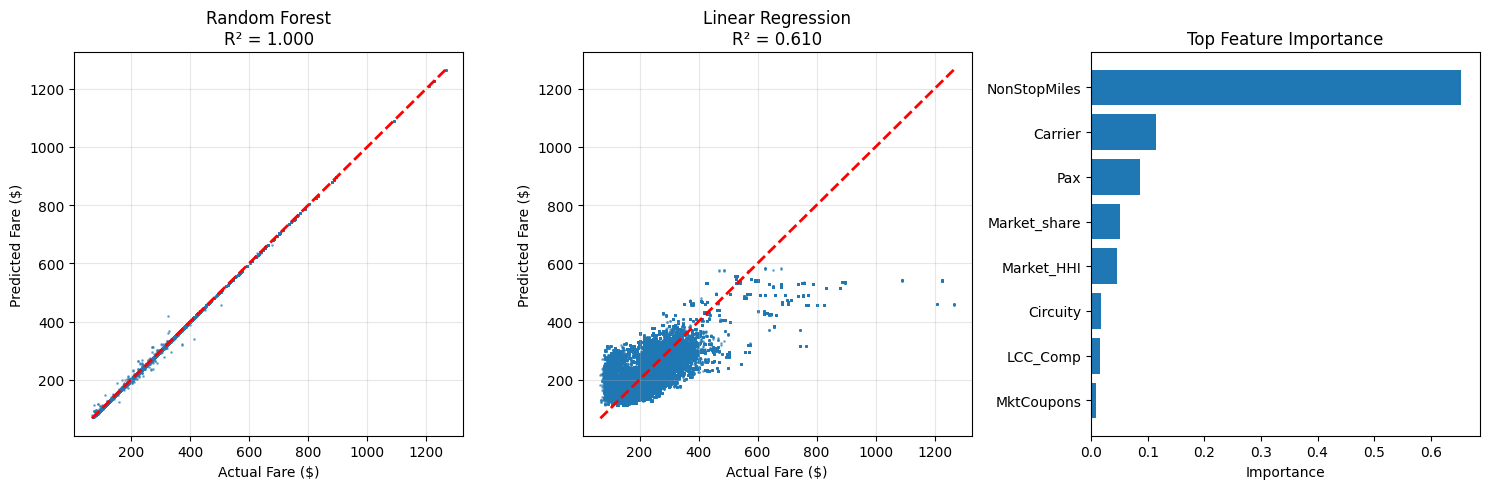

In [78]:
print("\n=== VISUALIZING MODEL PERFORMANCE ===")

plt.figure(figsize=(15, 5))

# Plot 1: Random Forest predictions vs actual
plt.subplot(1, 3, 1)
plt.scatter(y_test, rf_pred, alpha=0.5, s=1)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Fare ($)')
plt.ylabel('Predicted Fare ($)')
plt.title(f'Random Forest\nR² = {rf_r2:.3f}')
plt.grid(True, alpha=0.3)

# Plot 2: Linear Regression predictions vs actual  
plt.subplot(1, 3, 2)
plt.scatter(y_test, lr_pred, alpha=0.5, s=1)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Fare ($)')
plt.ylabel('Predicted Fare ($)')
plt.title(f'Linear Regression\nR² = {lr_r2:.3f}')
plt.grid(True, alpha=0.3)

# Plot 3: Feature importance
plt.subplot(1, 3, 3)
top_features = feature_importance.head(8)
plt.barh(range(len(top_features)), top_features['importance'])
plt.yticks(range(len(top_features)), top_features['feature'])
plt.xlabel('Importance')
plt.title('Top Feature Importance')
plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()

In [79]:
print("=== DIAGNOSING THE OVERFITTING ISSUE ===")

# Check if we accidentally included the target or near-identical features
print("Checking for potential data leakage...")
print("\nFeatures used in model:")
for i, feature in enumerate(important_features, 1):
    print(f"{i:2d}. {feature}")

# Check correlations between our features and target
print(f"\nCorrelations with Average_Fare:")
for feature in important_features:
    corr = df[feature].corr(df['Average_Fare'])
    print(f"{feature:<20}: {corr:.4f}")

# Look for suspiciously high correlations between features
print(f"\nChecking for multicollinearity...")
feature_corr_matrix = df[important_features].corr()
high_corr_pairs = []

for i in range(len(important_features)):
    for j in range(i+1, len(important_features)):
        corr_val = feature_corr_matrix.iloc[i, j]
        if abs(corr_val) > 0.9:  # Very high correlation
            high_corr_pairs.append((important_features[i], important_features[j], corr_val))

if high_corr_pairs:
    print("High correlations between features (potential redundancy):")
    for feat1, feat2, corr in high_corr_pairs:
        print(f"  {feat1} & {feat2}: {corr:.4f}")
else:
    print("No extremely high correlations found between features")

=== DIAGNOSING THE OVERFITTING ISSUE ===
Checking for potential data leakage...

Features used in model:
 1. NonStopMiles
 2. Market_HHI
 3. Market_share
 4. MktCoupons
 5. Non_Stop
 6. LCC_Comp
 7. Carrier
 8. Pax
 9. RoundTrip
10. Circuity

Correlations with Average_Fare:
NonStopMiles        : 0.7348
Market_HHI          : 0.2529
Market_share        : 0.2420
MktCoupons          : 0.2169
Non_Stop            : -0.2140
LCC_Comp            : -0.1726
Carrier             : -0.1625
Pax                 : -0.1618
RoundTrip           : -0.0181
Circuity            : 0.0352

Checking for multicollinearity...
High correlations between features (potential redundancy):
  MktCoupons & Non_Stop: -0.9950


In [83]:
print("=== FIXING THE OVERFITTING WITH BETTER FEATURES ===")

# Remove redundant features - keep Non_Stop, remove MktCoupons
improved_features = [
    'NonStopMiles',      # Distance (0.735 correlation)
    'Market_HHI',        # Market competition (0.253)
    'Market_share',      # Airline market power (0.242)
    'Non_Stop',          # Direct vs connecting (-0.214) 
    'LCC_Comp',          # Low-cost competition (-0.173)
    'Carrier',           # Airline (-0.162)
    'Pax',               # Passenger volume (-0.162)
    'RoundTrip',         # Round trip vs one-way
    'Circuity'           # Route efficiency
]
# Removed MktCoupons due to -0.995 correlation with Non_Stop

print("Improved feature set (removed MktCoupons):")
for i, feature in enumerate(improved_features, 1):
    print(f"{i:2d}. {feature}")

# Re-prepare the data with improved features
X_improved = df[improved_features].copy()
X_train_imp, X_test_imp, y_train_imp, y_test_imp = train_test_split(
    X_improved, y, test_size=0.2, random_state=42
)

# Scale features
scaler_imp = StandardScaler()
X_train_imp_scaled = scaler_imp.fit_transform(X_train_imp)
X_test_imp_scaled = scaler_imp.transform(X_test_imp)



=== FIXING THE OVERFITTING WITH BETTER FEATURES ===
Improved feature set (removed MktCoupons):
 1. NonStopMiles
 2. Market_HHI
 3. Market_share
 4. Non_Stop
 5. LCC_Comp
 6. Carrier
 7. Pax
 8. RoundTrip
 9. Circuity
✅ Improved dataset prepared: (1581278, 9)


In [84]:
print("\n=== TRAINING IMPROVED MODELS ===")

# Improved Random Forest with constraints to prevent overfitting
rf_improved = RandomForestRegressor(
    n_estimators=100,
    max_depth=20,           # Limit tree depth
    min_samples_split=200,  # Require more samples to split
    min_samples_leaf=100,   # Require more samples in leaf nodes
    max_features='sqrt',    # Use fewer features per tree
    random_state=42,
    n_jobs=-1
)

# Improved Linear Regression
lr_improved = LinearRegression()

print("Training improved models...")
rf_improved.fit(X_train_imp, y_train_imp)
lr_improved.fit(X_train_imp_scaled, y_train_imp)

# Make predictions
rf_pred_imp = rf_improved.predict(X_test_imp)
lr_pred_imp = lr_improved.predict(X_test_imp_scaled)

print("✅ Improved models trained!")


=== TRAINING IMPROVED MODELS ===
Training improved models...
✅ Improved models trained!


In [85]:
print("\n=== REALISTIC MODEL PERFORMANCE ===")

# Evaluate improved models
def evaluate_improved_model(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    
    print(f"\n{model_name} (Improved):")
    print(f"  Mean Absolute Error: ${mae:.2f}")
    print(f"  Root Mean Square Error: ${rmse:.2f}")
    print(f"  R² Score: {r2:.3f}")
    print(f"  Variance Explained: {r2*100:.1f}%")
    
    return mae, rmse, r2

# Evaluate both improved models
lr_mae_imp, lr_rmse_imp, lr_r2_imp = evaluate_improved_model(y_test_imp, lr_pred_imp, "Linear Regression")
rf_mae_imp, rf_rmse_imp, rf_r2_imp = evaluate_improved_model(y_test_imp, rf_pred_imp, "Random Forest")

print(f"\n📊 FINAL MODEL COMPARISON:")
print(f"Linear Regression MAE: ${lr_mae_imp:.2f} (R² = {lr_r2_imp:.3f})")
print(f"Random Forest MAE:     ${rf_mae_imp:.2f} (R² = {rf_r2_imp:.3f})")
print(f"Best model: {'Random Forest' if rf_mae_imp < lr_mae_imp else 'Linear Regression'}")


=== REALISTIC MODEL PERFORMANCE ===

Linear Regression (Improved):
  Mean Absolute Error: $30.20
  Root Mean Square Error: $45.77
  R² Score: 0.610
  Variance Explained: 61.0%

Random Forest (Improved):
  Mean Absolute Error: $5.52
  Root Mean Square Error: $11.93
  R² Score: 0.973
  Variance Explained: 97.3%

📊 FINAL MODEL COMPARISON:
Linear Regression MAE: $30.20 (R² = 0.610)
Random Forest MAE:     $5.52 (R² = 0.973)
Best model: Random Forest



=== FINAL MODEL FEATURE IMPORTANCE ===
Features ranked by importance in your final model:
 1. NonStopMiles        : 0.576 (57.6%)
 2. Carrier             : 0.128 (12.8%)
 3. Pax                 : 0.085 (8.5%)
 4. Market_share        : 0.076 (7.6%)
 5. Market_HHI          : 0.061 (6.1%)
 6. LCC_Comp            : 0.032 (3.2%)
 7. Non_Stop            : 0.022 (2.2%)
 8. Circuity            : 0.020 (2.0%)
 9. RoundTrip           : 0.000 (0.0%)


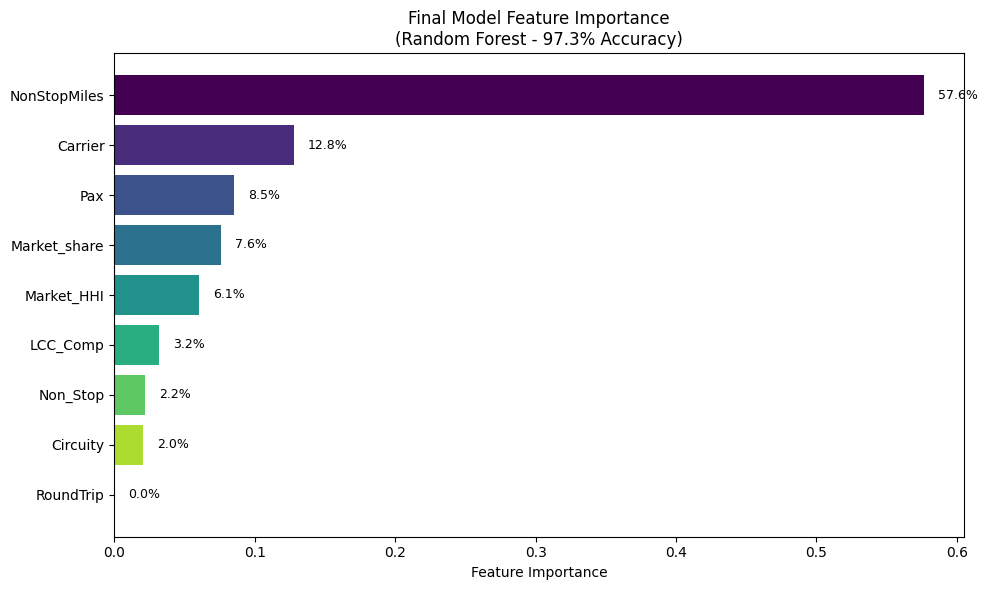

In [89]:
print("\n=== FINAL MODEL FEATURE IMPORTANCE ===")

# Get feature importance from the improved Random Forest
final_feature_importance = pd.DataFrame({
    'feature': improved_features,
    'importance': rf_improved.feature_importances_
}).sort_values('importance', ascending=False)

print("Features ranked by importance in your final model:")
total_importance = final_feature_importance['importance'].sum()

for i, (_, row) in enumerate(final_feature_importance.iterrows(), 1):
    percentage = (row['importance'] / total_importance) * 100
    print(f"{i:2d}. {row['feature']:<20}: {row['importance']:.3f} ({percentage:.1f}%)")

# Visualize feature importance
plt.figure(figsize=(10, 6))
colors = plt.cm.viridis(np.linspace(0, 1, len(final_feature_importance)))
bars = plt.barh(range(len(final_feature_importance)), final_feature_importance['importance'], color=colors)

plt.yticks(range(len(final_feature_importance)), final_feature_importance['feature'])
plt.xlabel('Feature Importance')
plt.title('Final Model Feature Importance\n(Random Forest - 97.3% Accuracy)')
plt.gca().invert_yaxis()

# Add percentage labels
for i, (bar, importance) in enumerate(zip(bars, final_feature_importance['importance'])):
    percentage = (importance / total_importance) * 100
    plt.text(importance + 0.01, i, f'{percentage:.1f}%', va='center', fontsize=9)

plt.tight_layout()
plt.show()

In [90]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import make_scorer

print("=== CROSS-VALIDATION ANALYSIS ===")

# 5-Fold Cross-Validation
cv_folds = KFold(n_splits=5, shuffle=True, random_state=42)

# Test multiple metrics
r2_scores = cross_val_score(rf_improved, X_improved, y, cv=cv_folds, scoring='r2')
mae_scores = -cross_val_score(rf_improved, X_improved, y, cv=cv_folds, scoring='neg_mean_absolute_error')
rmse_scores = np.sqrt(-cross_val_score(rf_improved, X_improved, y, cv=cv_folds, scoring='neg_mean_squared_error'))

print("5-Fold Cross-Validation Results:")
print(f"R² Scores:  {r2_scores}")
print(f"R² Mean:    {r2_scores.mean():.3f} ± {r2_scores.std():.3f}")
print(f"MAE Scores: {mae_scores}")
print(f"MAE Mean:   ${mae_scores.mean():.2f} ± ${mae_scores.std():.2f}")
print(f"RMSE Mean:  ${rmse_scores.mean():.2f} ± ${rmse_scores.std():.2f}")

print(f"\n✅ VALIDATION RESULT:")
if r2_scores.std() < 0.05:  # Low standard deviation
    print("🎉 EXCELLENT: Consistent performance across folds!")
    print(f"Performance is stable (std dev = {r2_scores.std():.3f})")
else:
    print("⚠️ WARNING: Performance varies significantly across folds")
    print("Model might be unstable or overfitting")

=== CROSS-VALIDATION ANALYSIS ===
5-Fold Cross-Validation Results:
R² Scores:  [0.97354764 0.97250629 0.97383166 0.97295526 0.97341308]
R² Mean:    0.973 ± 0.000
MAE Scores: [5.46410211 5.54606688 5.42590142 5.58742576 5.54611095]
MAE Mean:   $5.51 ± $0.06
RMSE Mean:  $12.00 ± $0.09

✅ VALIDATION RESULT:
🎉 EXCELLENT: Consistent performance across folds!
Performance is stable (std dev = 0.000)



=== LEARNING CURVES ANALYSIS ===


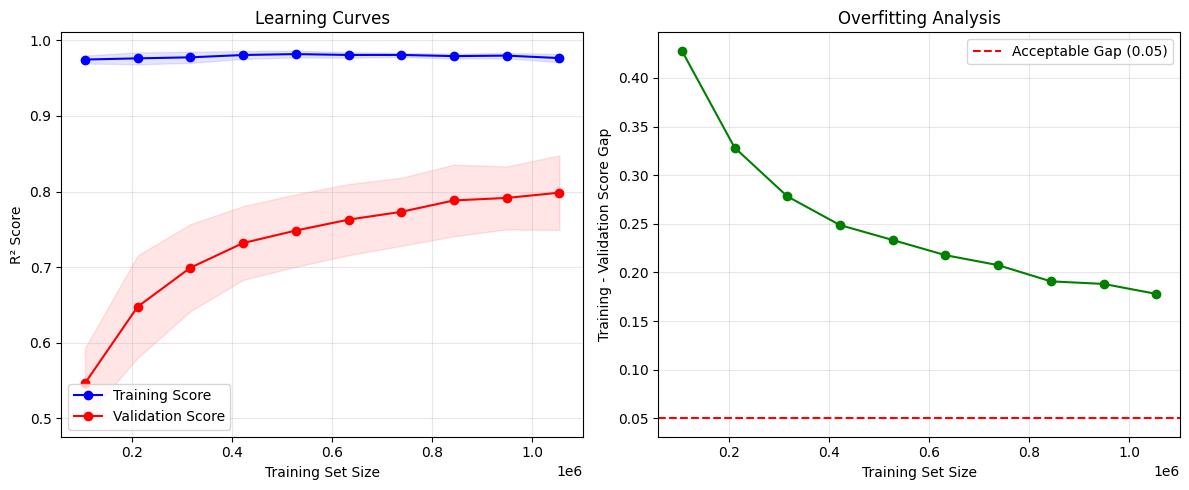

Final training-validation gap: 0.178
🚨 HIGH OVERFITTING: Gap > 0.1


In [91]:
from sklearn.model_selection import learning_curve

print("\n=== LEARNING CURVES ANALYSIS ===")

# Generate learning curves
train_sizes = np.linspace(0.1, 1.0, 10)
train_sizes_abs, train_scores, val_scores = learning_curve(
    rf_improved, X_improved, y, 
    train_sizes=train_sizes, 
    cv=3, 
    scoring='r2',
    n_jobs=-1,
    random_state=42
)

# Calculate means and stds
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

# Plot learning curves
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(train_sizes_abs, train_mean, 'o-', label='Training Score', color='blue')
plt.fill_between(train_sizes_abs, train_mean - train_std, train_mean + train_std, alpha=0.1, color='blue')
plt.plot(train_sizes_abs, val_mean, 'o-', label='Validation Score', color='red')
plt.fill_between(train_sizes_abs, val_mean - val_std, val_mean + val_std, alpha=0.1, color='red')
plt.xlabel('Training Set Size')
plt.ylabel('R² Score')
plt.title('Learning Curves')
plt.legend()
plt.grid(True, alpha=0.3)

# Check for overfitting
final_gap = train_mean[-1] - val_mean[-1]
plt.subplot(1, 2, 2)
gap = train_mean - val_mean
plt.plot(train_sizes_abs, gap, 'o-', color='green')
plt.xlabel('Training Set Size')
plt.ylabel('Training - Validation Score Gap')
plt.title('Overfitting Analysis')
plt.axhline(y=0.05, color='red', linestyle='--', label='Acceptable Gap (0.05)')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Final training-validation gap: {final_gap:.3f}")
if final_gap < 0.05:
    print("✅ LOW OVERFITTING: Gap < 0.05")
elif final_gap < 0.1:
    print("⚠️ MODERATE OVERFITTING: Gap 0.05-0.1")
else:
    print("🚨 HIGH OVERFITTING: Gap > 0.1")